Moving objects captured by fixed cameras are the focus of several computer vision applications.

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

a) Write a function that performs pixel-by-pixel frame differencing using, as reference frame, the first frame of an image sequence. Apply a classification threshold and save the results.

In [21]:
def ICV_pixel_frame_differencing(ref_fram, cur_frame):
    
    motion = np.zeros((ref_fram.shape[0],ref_fram.shape[1]))
    
    for i in range(motion.shape[0]):
        for j in range(motion.shape[1]):
            motion[i][j] = np.abs(ref_frame[i][j] - cur_frame[i][j])
    
    plt.imshow(motion,cmap='gray')
    plt.show()
    
    return motion

In [22]:
def ICV_greyscale(image):
    #create copy of original_image
    grey = np.zeros((image.shape[0],image.shape[1]))
    #using BT.601 to convert image to greysclae
    #Gray = (Red * 0.299 + Green * 0.587 + Blue * 0.114)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grey[i][j] = image[i][j][0] * 0.299 + image[i][j][1] * 0.587 + image[i][j][2] * 0.114
    
    return grey

In [ ]:
frames = []

cap = cv2.VideoCapture('DatasetC.mpg')
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        #cv2.imshow('frame',frame)
        frames.append(ICV_greyscale(frame))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
motion = np.zeros((frames[0].shape[0],frames[0].shape[1]))

ref_frame = frames[0]

for frame in frames[1:]:
    curent_motion = ICV_pixel_frame_differencing(ref_frame, frame)
    
    for i in range(motion.shape[0]):
        for j in range(motion.shape[1]):
            motion[i][j] += curent_motion[i][j]
            
print('------')
plt.imshow(motion,cmap='gray')
plt.show()

b) Repeat the exercise using the previous frame as reference frame (use frame It-1 as reference frame for frame It, for each t). Comment the results in the report.

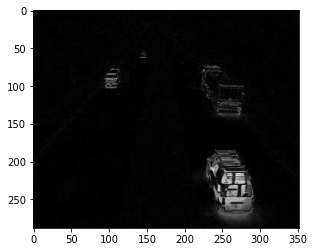

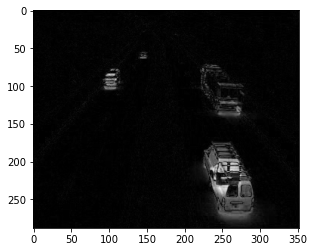

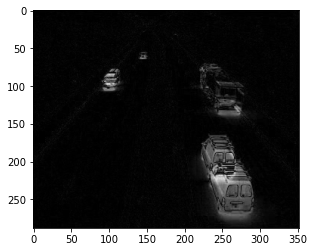

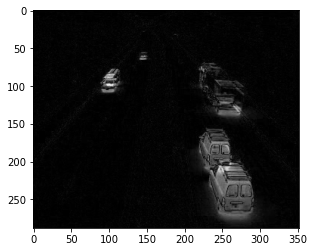

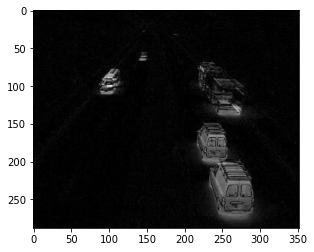

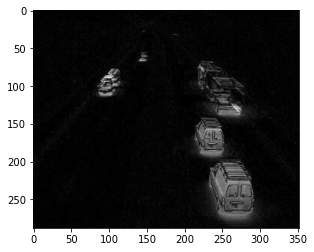

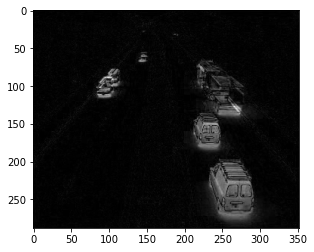

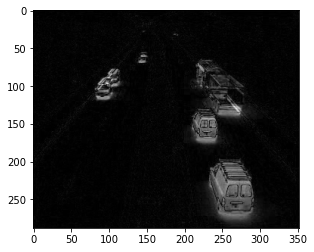

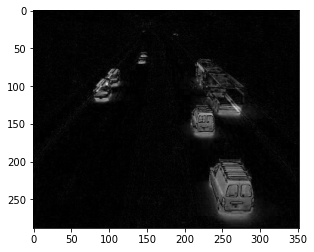

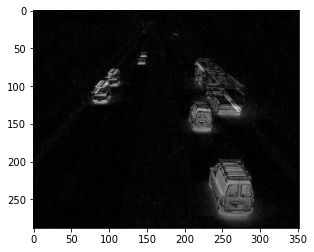

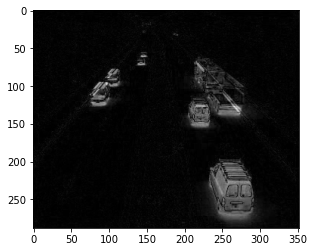

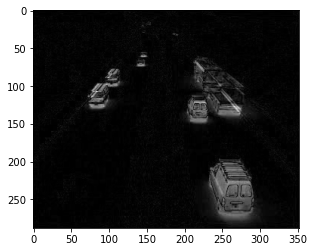

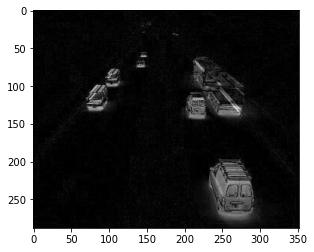

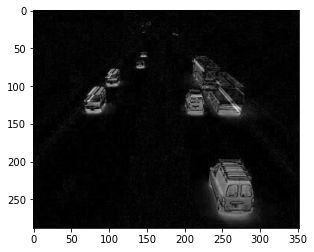

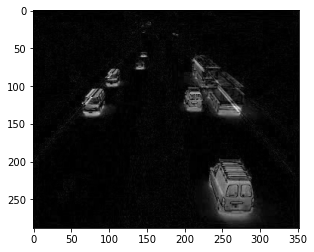

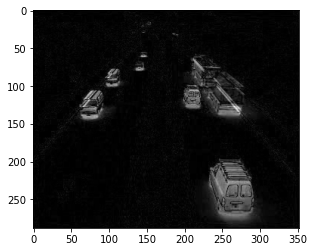

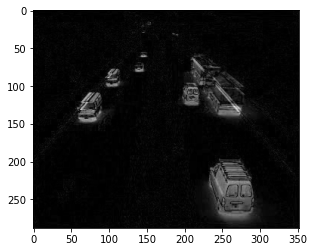

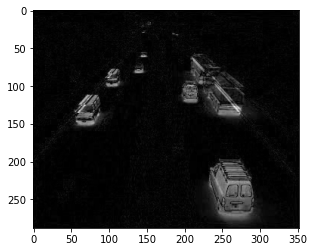

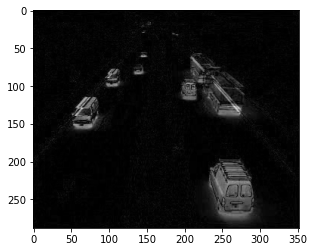

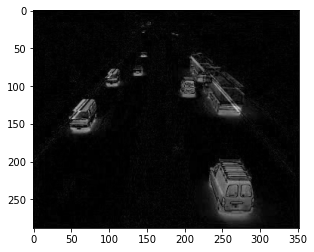

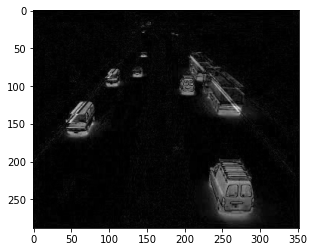

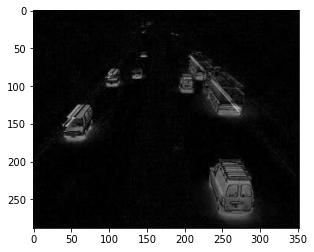

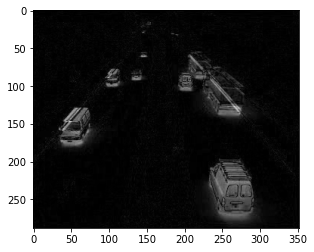

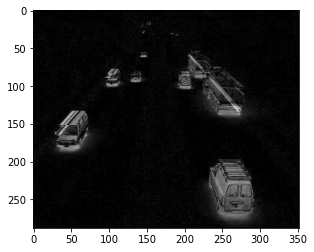

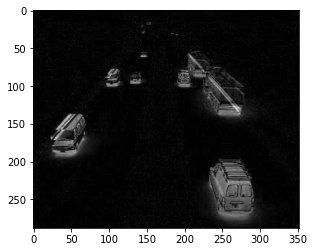

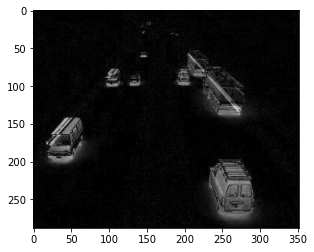

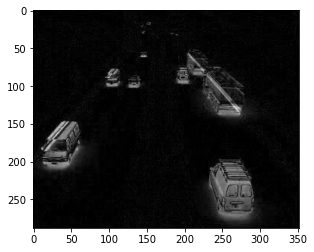

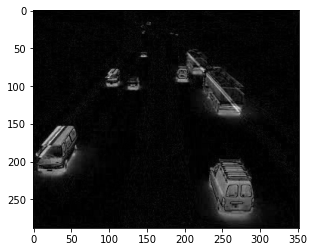

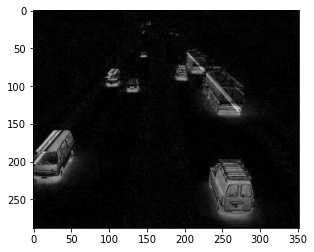

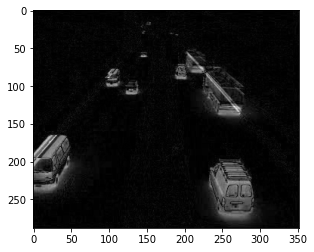

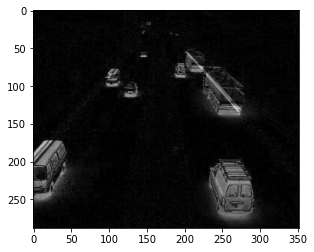

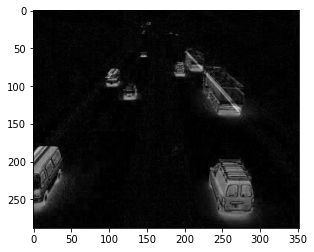

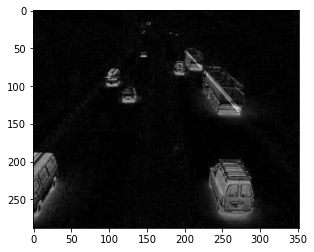

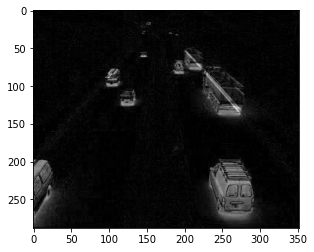

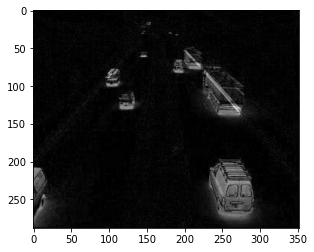

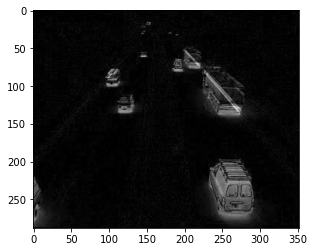

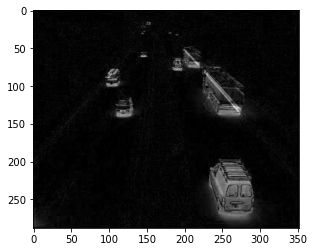

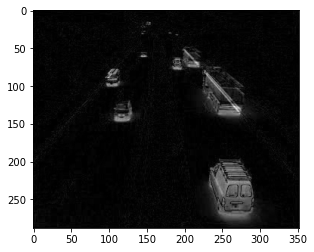

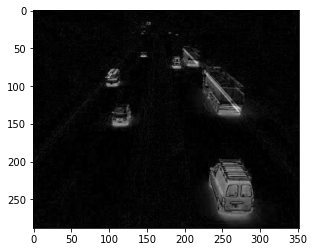

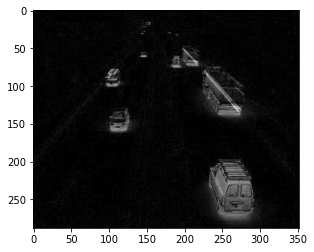

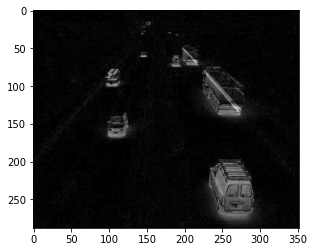

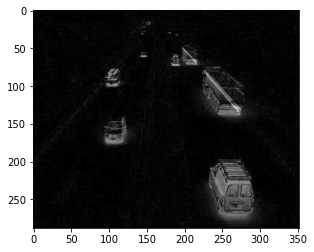

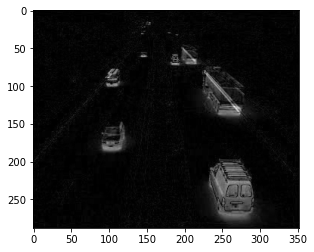

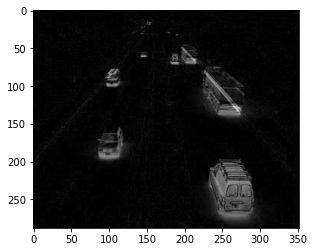

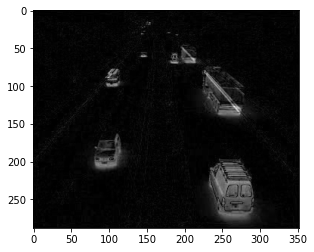

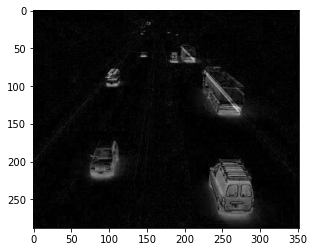

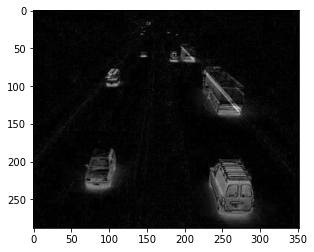

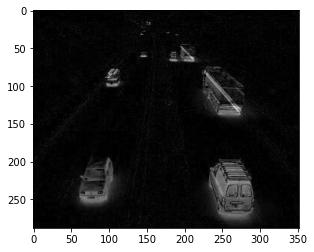

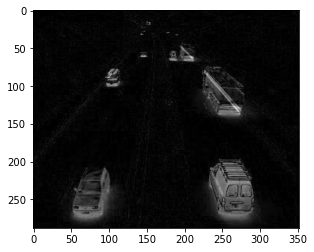

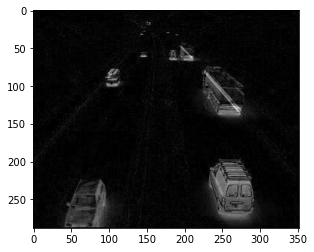

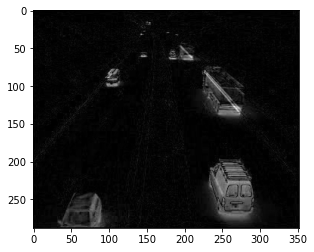

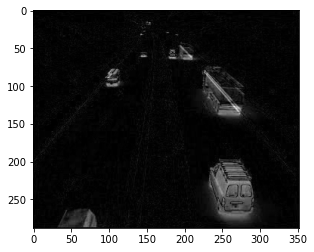

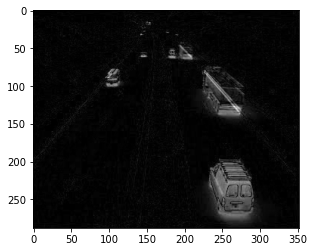

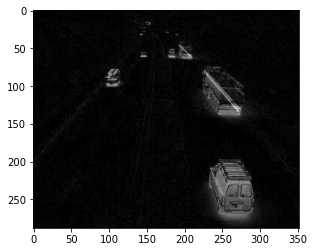

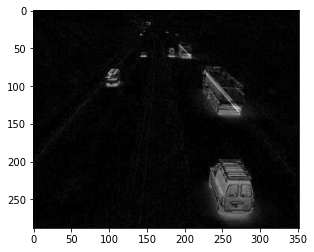

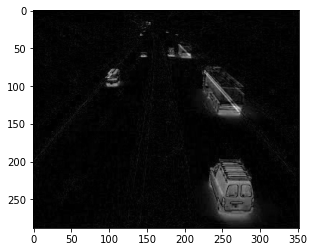

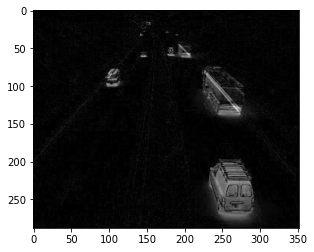

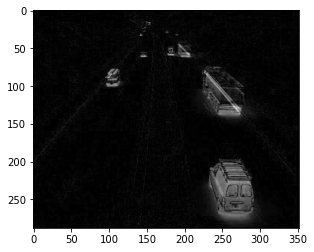

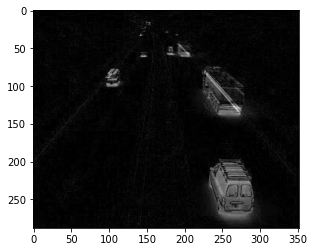

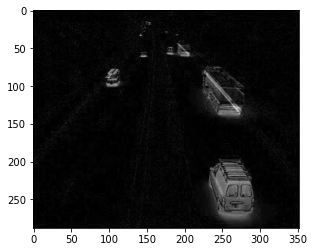

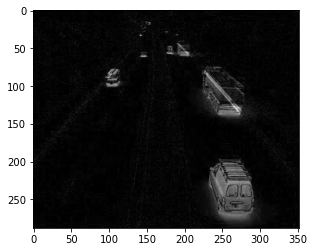

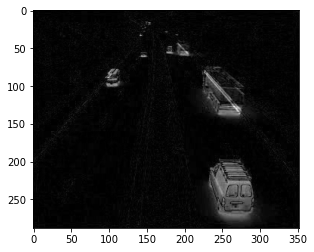

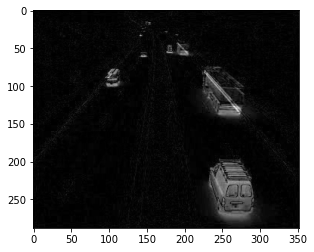

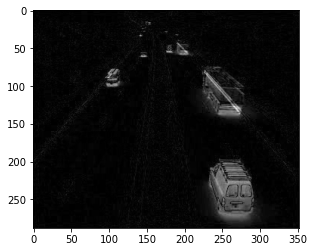

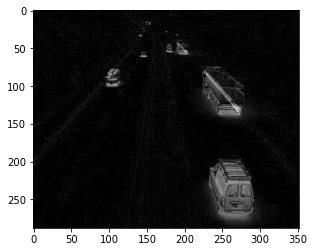

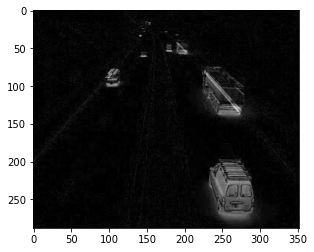

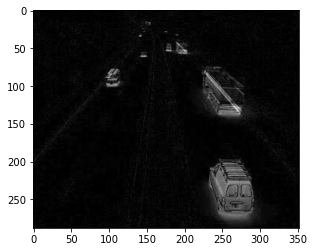

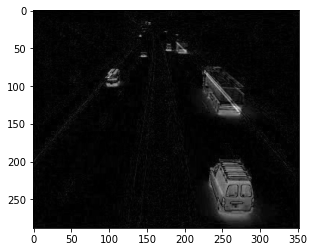

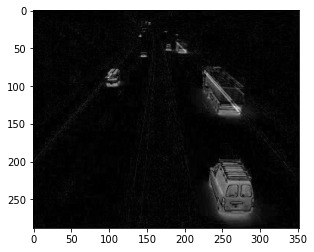

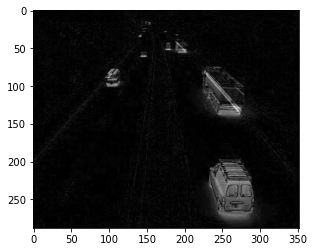

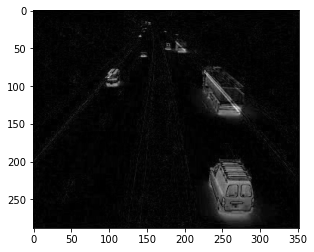

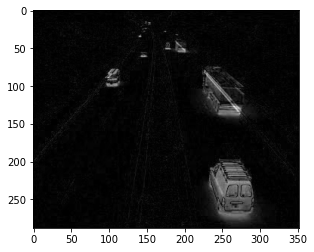

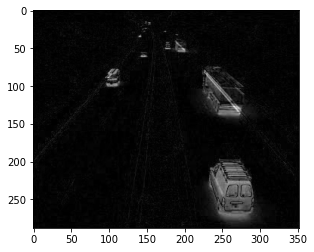

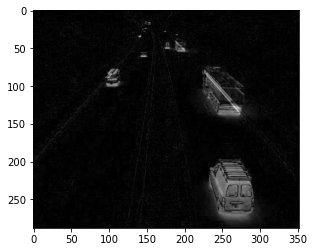

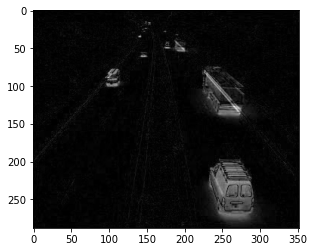

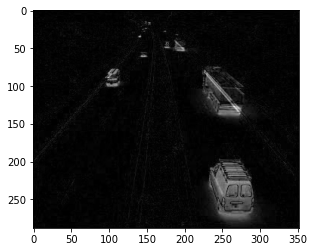

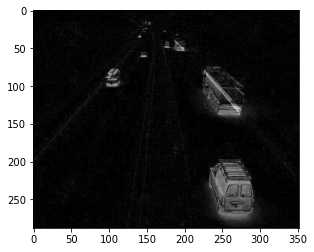

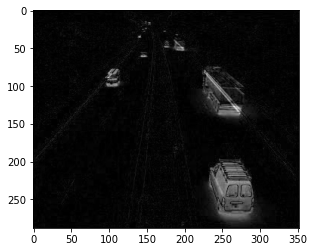

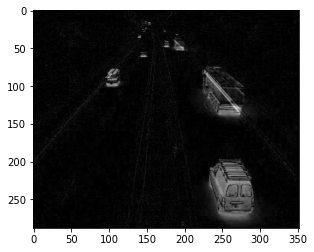

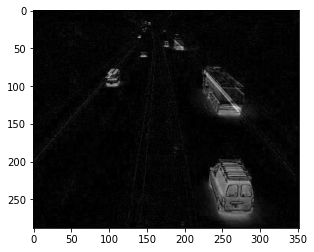

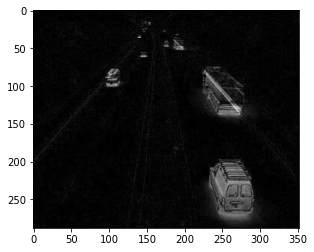

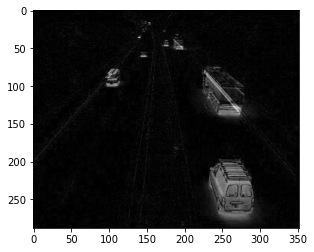

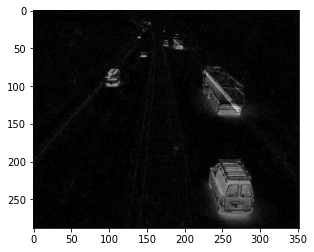

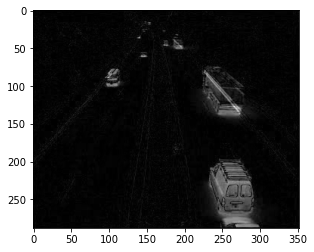

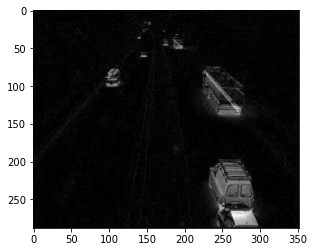

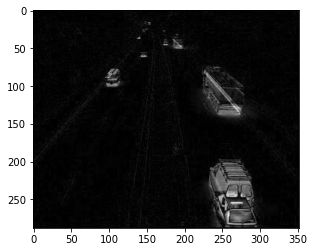

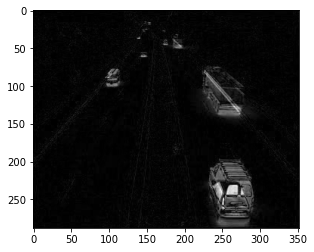

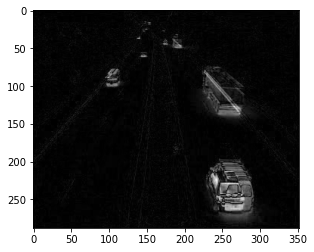

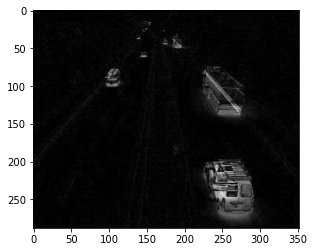

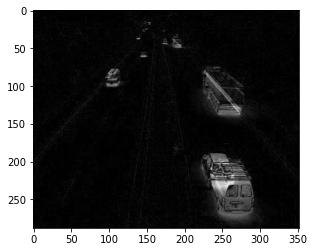

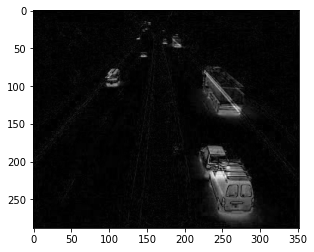

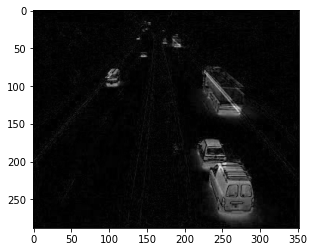

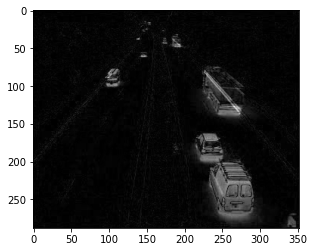

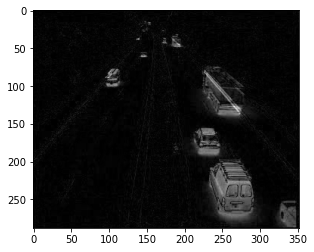

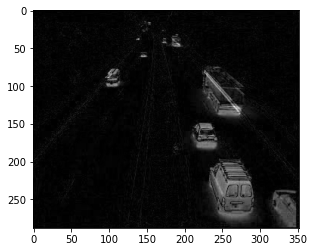

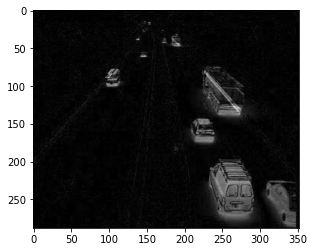

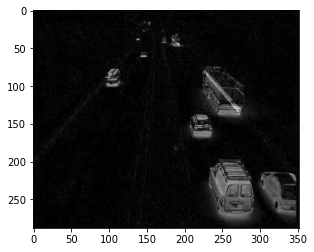

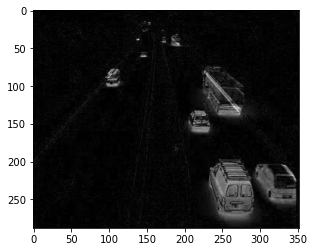

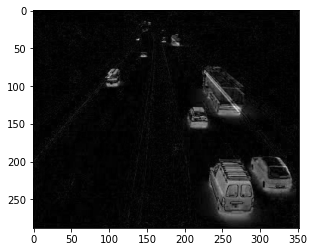

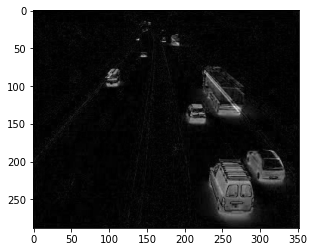

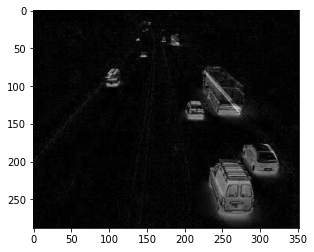

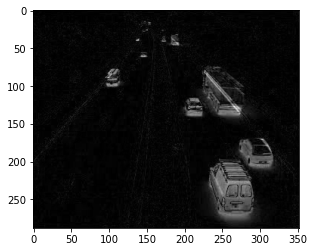

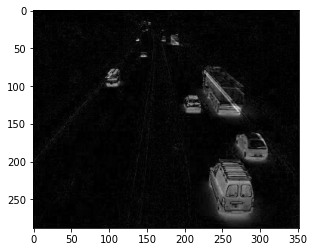

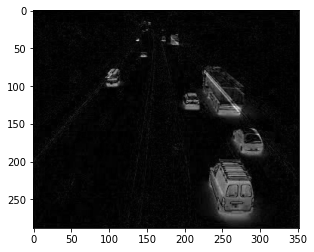

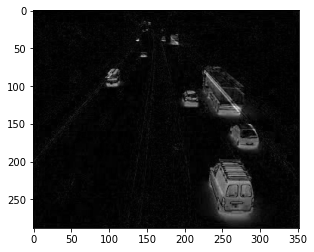

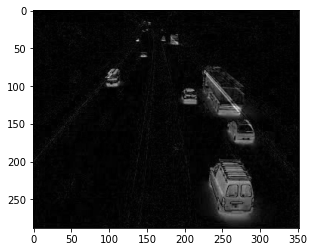

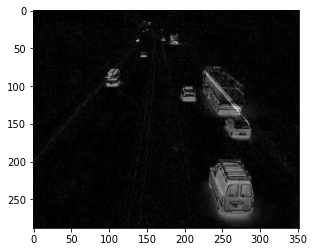

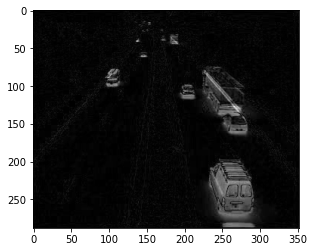

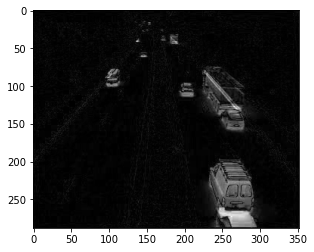

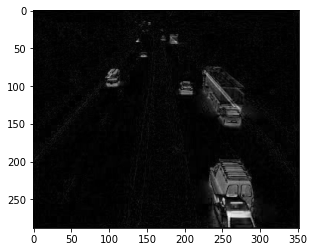

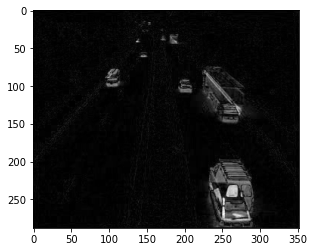

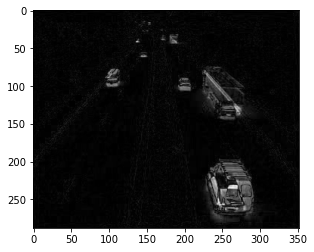

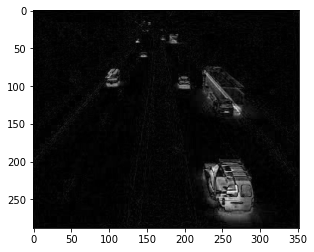

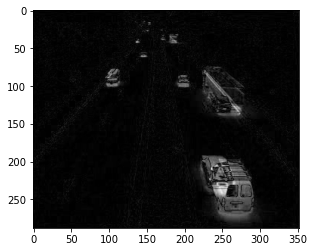

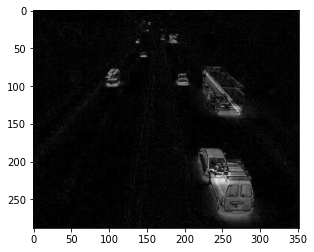

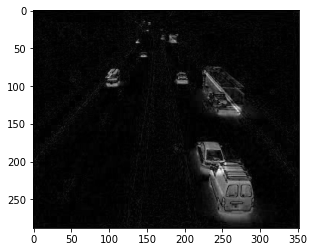

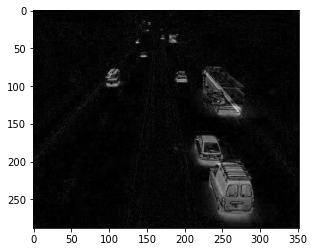

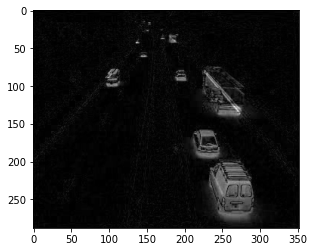

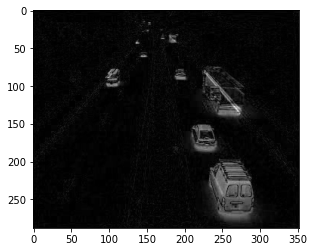

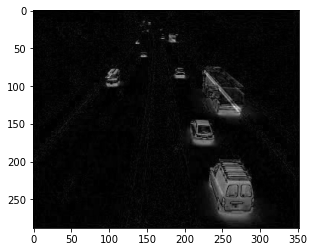

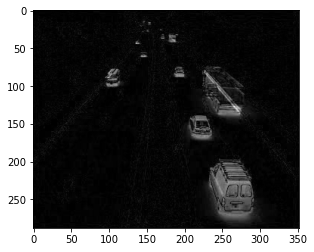

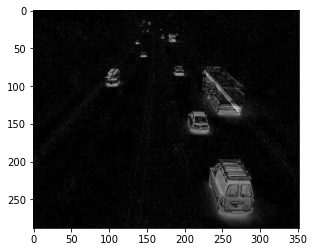

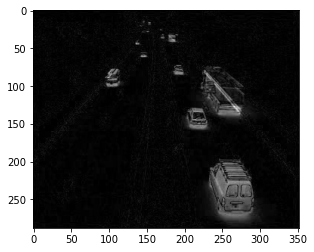

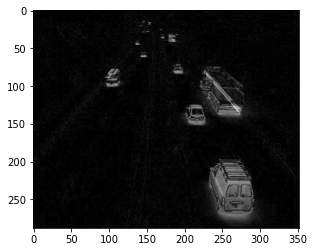

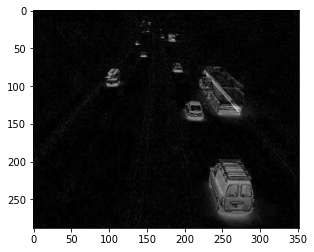

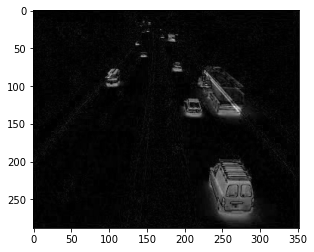

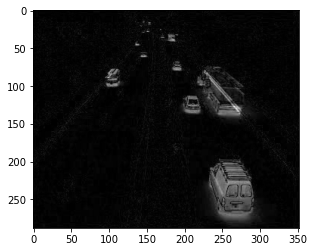

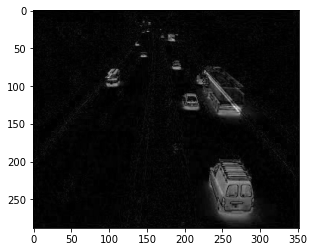

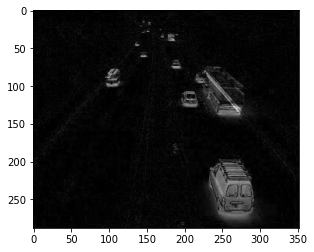

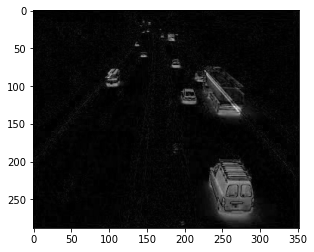

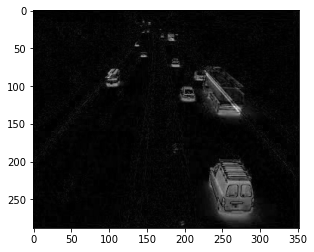

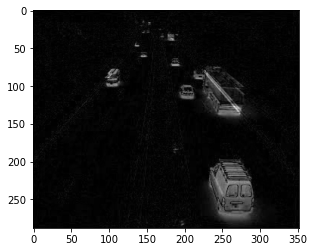

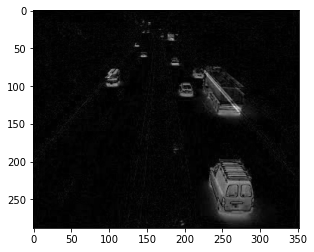

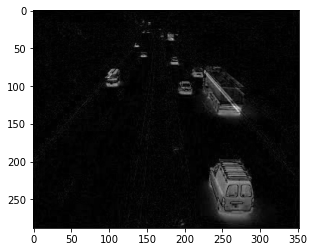

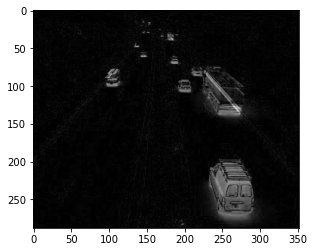

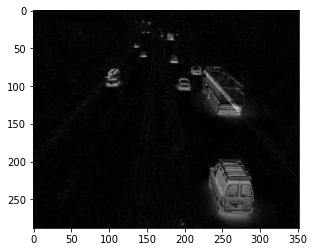

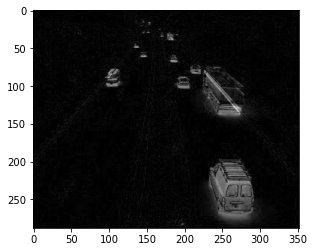

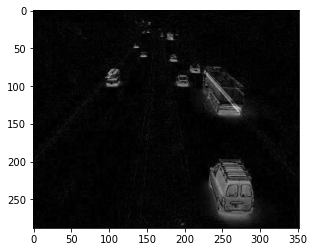

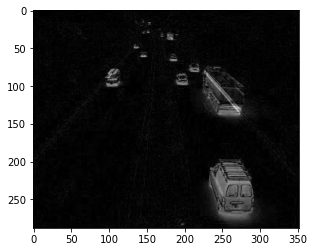

------


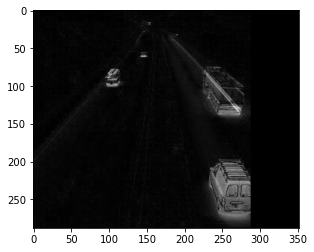

In [16]:
motion = np.zeros((frames[0].shape[0],frames[0].shape[1]))

for i in range(1,len(frames)):
    curent_motion = ICV_pixel_frame_differencing(frames[i-1], frames[i])
    
    for i in range(motion.shape[0]):
        for j in range(motion.shape[1]):
            motion[i][j] += curent_motion[i][j]
            
            
print('------')
plt.imshow(motion,cmap='gray')
plt.show()

c) Write a function that generates a reference frame (background) for the sequence using for example frame differencing and a weighted temporal averaging algorithm.

d) Write a function that counts the number of moving objects in each frame of a sequence. Generate a bar plot that visualizes the number of objects for each frame of the whole sequence. Discuss in the report the implemented solution, including advantages and disadvantages.